<a href="https://colab.research.google.com/github/cbrumm/deep-learning-with-python-book/blob/main/Chapter_5_Generalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

num_noise_channels = 784
train_images_with_noise_channels = np.concatenate([train_images,
  np.random.random((len(train_images), num_noise_channels))], axis=1)
train_images_with_zeros_channels = np.concatenate([train_images,
  np.zeros((len(train_images), num_noise_channels))], axis=1)

from tensorflow import keras
from tensorflow.keras import layers

def get_model():
  model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])
  model.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

model = get_model()
history_noise = model.fit(train_images_with_noise_channels, train_labels,
                          epochs=10, batch_size=128, validation_split=0.2)
history_zeros = model.fit(train_images_with_zeros_channels, train_labels,
                          epochs=10, batch_size=128, validation_split=0.2)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
375/375 [==============================] - 8s 20ms/step - loss: 0.6265 - accuracy: 0.8100 - val_loss: 0.2746 - val_accuracy: 0.9188
Epoch 2/10
375/375 [==============================] - 7s 20ms/step - loss: 0.2632 - accuracy: 0.9195 - val_loss: 0.2130 - val_accuracy: 0.9364
Epoch 3/10
375/375 [==============================] - 6s 17ms/step - loss: 0.1766 - accuracy: 0.9457 - val_loss: 0.1949 - val_accuracy: 0.9392
Epoch 4/10
375/375 [==============================] - 7s 20ms/step - loss: 0.1253 - accuracy: 0.9616 - val_loss: 0.1540 - val_accuracy: 0.9548
Epoch 5/10
375/375 [==============================] - 6s 17ms/step - loss: 0.0931 - accuracy: 0.9713 - val_loss: 0.1271 - val_accuracy: 0.9632
Epoch 6/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0689 - accuracy: 0.9784 - val_loss: 0.1455 - val_accuracy: 0.9590
Epoch 7/10
375/375 [==============================] - 6s 17ms/step - loss: 0.

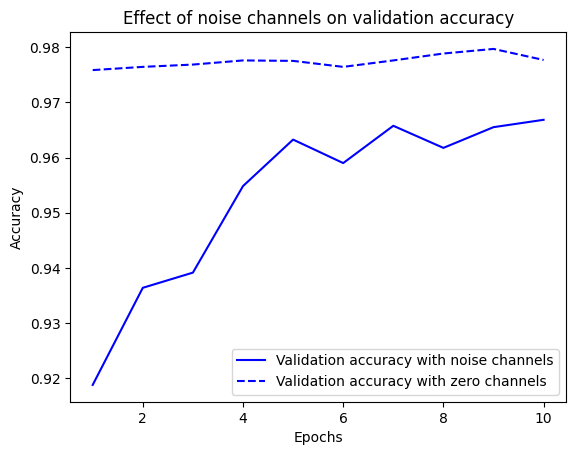

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, val_acc_noise, 'b-',
         label='Validation accuracy with noise channels')
plt.plot(epochs, val_acc_zeros, 'b--',
         label='Validation accuracy with zero channels')
plt.title('Effect of noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
  layers.Dense(512, activation='relu'),
  layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

random_labels_history = model.fit(train_images, random_train_labels, epochs=20,
                                  batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 6s 15ms/step - loss: 2.3148 - accuracy: 0.1029 - val_loss: 2.3049 - val_accuracy: 0.1055
Epoch 2/20
375/375 [==============================] - 5s 12ms/step - loss: 2.3001 - accuracy: 0.1148 - val_loss: 2.3099 - val_accuracy: 0.0972
Epoch 3/20
375/375 [==============================] - 6s 17ms/step - loss: 2.2923 - accuracy: 0.1240 - val_loss: 2.3161 - val_accuracy: 0.0997
Epoch 4/20
375/375 [==============================] - 4s 12ms/step - loss: 2.2809 - accuracy: 0.1342 - val_loss: 2.3227 - val_accuracy: 0.1044
Epoch 5/20
375/375 [==============================] - 4s 11ms/step - loss: 2.2660 - accuracy: 0.1481 - val_loss: 2.3370 - val_accuracy: 0.0996
Epoch 6/20
375/375 [==============================] - 5s 14ms/step - loss: 2.2468 - accuracy: 0.1641 - val_loss: 2.3501 - val_accuracy: 0.1017
Epoch 7/20
375/375 [==============================] - 4s 11ms/step - loss: 2.2244 - accuracy: 0.1789 - val_loss: 2.3712 - val_accuracy: 0.1025

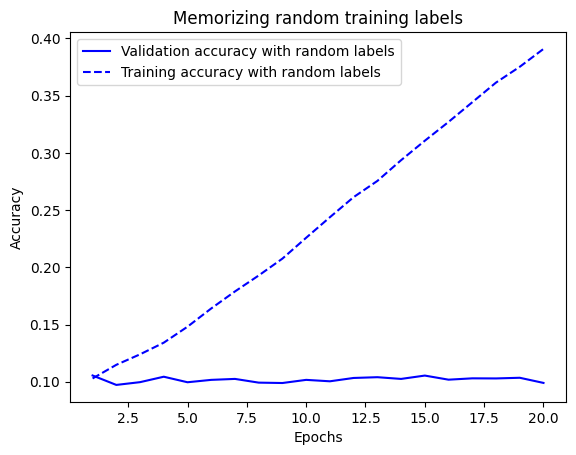

In [11]:
import matplotlib.pyplot as plt
training_accuracy = random_labels_history.history['accuracy']
validation_accuracy = random_labels_history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, validation_accuracy, 'b-',
         label='Validation accuracy with random labels')
plt.plot(epochs, training_accuracy, 'b--',
         label='Training accuracy with random labels')
plt.title('Memorizing random training labels')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()